In [1]:
# prerequisite
# pip install -U imbalanced-learn

In [2]:
import matplotlib.pyplot as plt
from pipelines.DataPipeline import DataPipeline
from transformers.Preprocessing import Preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from utils.Common import Config

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
RAW_DATA_PATH = "../data/raw/KSI.csv"
df = pd.read_csv(RAW_DATA_PATH)

In [4]:
# fill missing values, adding new columns, extracting useful columns
pc = Preprocessing(df, Config.binary_columns, Config.cat_attribs, Config.num_attribs, Config.label)
new_df = pc.getFrame()

In [5]:
# seperate feature and label
X = new_df[Config.cat_attribs + Config.num_attribs+ Config.binary_columns]
Y = new_df[Config.label]

In [6]:
# pass feature to pipeline and convert it to numerical data
X = DataPipeline(Config.num_attribs,Config.cat_attribs).process(X)

In [7]:
X.isna().sum().sum()

0

In [8]:
Y.value_counts().tolist()

[14246, 2201]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=Config.test_size, stratify=Y, random_state=42)

In [10]:
smote_minority = SMOTE(sampling_strategy = "minority", random_state=42)
X_train_sm, y_train_sm = smote_minority.fit_resample(X_train, y_train)


In [11]:

# Create param grid
param_grid = {
              'n_neighbors': [5,9,13,17],
              'weights': ['uniform', 'distance'],
              'algorithm': ['kd_tree', 'brute'],
               'metric' : ['manhattan']
            } 

clf = GridSearchCV(
    estimator=KNeighborsClassifier(),
    scoring="accuracy",
    param_grid=param_grid,
    cv=10,
    refit=True,
    verbose=3
)

best_clf = clf.fit(X_train_sm, y_train_sm)

best_clf.best_score_

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV 1/10] END algorithm=kd_tree, metric=manhattan, n_neighbors=5, weights=uniform;, score=0.946 total time=   3.3s
[CV 2/10] END algorithm=kd_tree, metric=manhattan, n_neighbors=5, weights=uniform;, score=0.939 total time=   3.4s
[CV 3/10] END algorithm=kd_tree, metric=manhattan, n_neighbors=5, weights=uniform;, score=0.940 total time=   3.5s
[CV 4/10] END algorithm=kd_tree, metric=manhattan, n_neighbors=5, weights=uniform;, score=0.942 total time=   3.3s
[CV 5/10] END algorithm=kd_tree, metric=manhattan, n_neighbors=5, weights=uniform;, score=0.940 total time=   3.4s
[CV 6/10] END algorithm=kd_tree, metric=manhattan, n_neighbors=5, weights=uniform;, score=0.941 total time=   3.2s
[CV 7/10] END algorithm=kd_tree, metric=manhattan, n_neighbors=5, weights=uniform;, score=0.950 total time=   3.3s
[CV 8/10] END algorithm=kd_tree, metric=manhattan, n_neighbors=5, weights=uniform;, score=0.939 total time=   3.1s
[CV 9/10] END alg

0.9523955566846032

In [12]:
best_model = best_clf.best_estimator_
best_model.score(X_test,y_test)

0.8951367781155015

In [13]:
best_model.score(X_train, y_train)

1.0

In [15]:
best_model.score(X_train_sm, y_train_sm)

1.0

In [14]:
best_model.score(X_test, y_test)

0.8951367781155015

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

y_train_pred = best_model.predict(X_train)
y_train_sm_pred = best_model.predict(X_train_sm)
y_test_pred = best_model.predict(X_test)

print(classification_report(y_train,y_train_pred))
print(classification_report(y_train_sm,y_train_sm_pred))
print(classification_report(y_test,y_test_pred))

print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_train_sm,y_train_sm_pred))
print(accuracy_score(y_test,y_test_pred))

print(precision_score(y_train,y_train_pred))
print(precision_score(y_train_sm,y_train_sm_pred))
print(precision_score(y_test,y_test_pred))

print(recall_score(y_train,y_train_pred))
print(recall_score(y_train_sm,y_train_sm_pred))
print(recall_score(y_test,y_test_pred))

print(f1_score(y_train,y_train_pred))
print(f1_score(y_train_sm,y_train_sm_pred))
print(f1_score(y_test,y_test_pred))

print(confusion_matrix(y_train,y_train_pred))
print(confusion_matrix(y_train_sm,y_train_sm_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11396
           1       1.00      1.00      1.00      1761

    accuracy                           1.00     13157
   macro avg       1.00      1.00      1.00     13157
weighted avg       1.00      1.00      1.00     13157

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11396
           1       1.00      1.00      1.00     11396

    accuracy                           1.00     22792
   macro avg       1.00      1.00      1.00     22792
weighted avg       1.00      1.00      1.00     22792

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      2850
           1       0.58      0.81      0.67       440

    accuracy                           0.90      3290
   macro avg       0.77      0.86      0.81      3290
weighted avg       0.92      0.90      0.90      3290

1.0
1.0
0.895136778

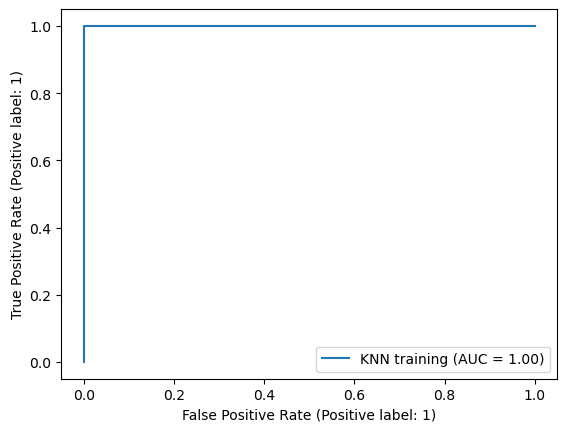

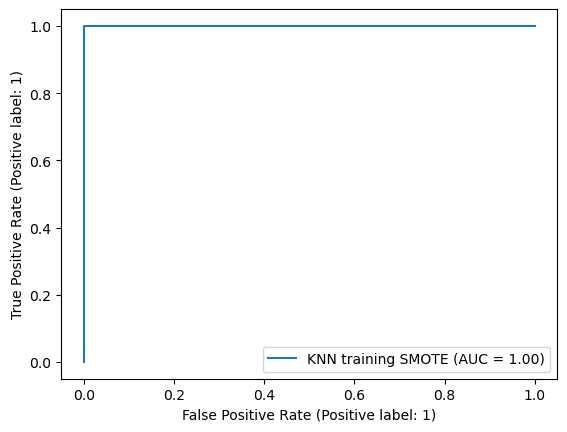

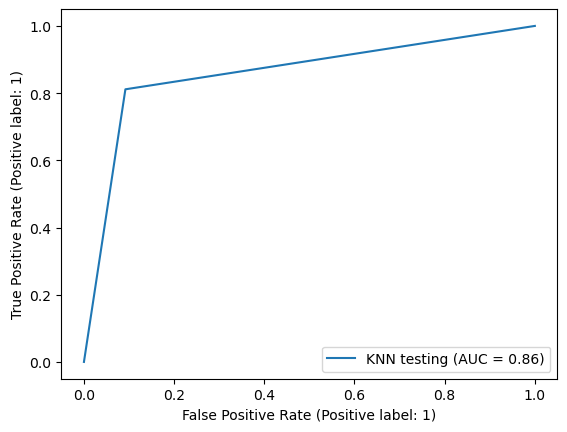

In [31]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
RocCurveDisplay.from_predictions(y_train, y_train_pred, name="KNN training")
RocCurveDisplay.from_predictions(y_train_sm,y_train_sm_pred, name="KNN training SMOTE")
RocCurveDisplay.from_predictions(y_test, y_test_pred, name="KNN testing")
plt.show()

In [17]:
best_clf.best_params_
# {'algorithm': 'kd_tree',  'metric': 'manhattan',  'n_neighbors': 5,  'weights': 'distance'}


{'algorithm': 'kd_tree',
 'metric': 'manhattan',
 'n_neighbors': 5,
 'weights': 'distance'}

In [18]:
import joblib
from sklearn.neighbors import KNeighborsClassifier

best_model = KNeighborsClassifier(algorithm= 'kd_tree',  metric= 'manhattan',  n_neighbors= 5,  weights= 'distance')
best_model.fit(X_train_sm, y_train_sm)

joblib.dump(best_model,'../models/best_model_knn.pkl')


['../models/best_model_knn.pkl']